Fundamentals of Machine Learning Assignment by Mine Akbaba

# Predicting the Song Genre and Popularity through audio features 

This research is about how good the prediction of the genre of a song by the audio features are and how good the popularity of a song can be predicted by the audio features. Therefore, I used the tracks of my personal playlists (5 playlists). The datasets are collected in seperate Files (1_GettingPlaylist - 5_GettingPlaylist) and I used the following source: https://github.com/plamere/spotipy/tree/master/examples

All informations I wrote down are based on the course of Fundamentals of Machine Learning or the source is noted.


## 1) Song Genre through classification

To classify the genre (dependent variable) we need Features that describe the genre of a song at its best. Due to the project limitation, the maximum are 7 features (independent variable). The genre, which we predict, is a categorical variable and all features are numerical variables.



In [1]:
import math
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats.stats import pearsonr 
import seaborn as sns

# Library sklearn
# sk-learn is the standard libary for statistics and machine learning
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.preprocessing import normalize 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

import pandas as pd


In [2]:
playlist1 = pd.read_csv("playlist1.csv")
playlist2 = pd.read_csv("playlist2.csv")
playlist3 = pd.read_csv("playlist3.csv")
playlist4 = pd.read_csv("playlist4.csv")
playlist5 = pd.read_csv("playlist5.csv")

In [3]:
df = pd.concat([playlist1, playlist2, playlist3, playlist4, playlist5], axis=0)

In [4]:
df.head(5)

,Unnamed: 0,trackname,album,artist,length,popularity,danceability,acousticness,energy,instrumentalness,mode,liveness,loudness,speechiness,tempo,time_signature,valence,genres
0,0,Unter meiner Haut,Unter meiner Haut,ELIF,195253,45,0.643,0.0582,0.711,0.0,1,0.0509,-7.049,0.0640,92.014,4,0.363,dutch experimental electronic
1,7,GITARRE,NACHT,ELIF,188484,39,0.810,0.0326,0.743,0.0,0,0.1250,-5.664,0.0348,125.979,4,0.272,dutch experimental electronic
2,14,ABER WO BIST DU,NACHT,ELIF,185274,50,0.780,0.2300,0.592,0.0,0,0.1840,-6.020,0.0631,148.057,4,0.705,dutch experimental electronic
3,21,ALASKA,NACHT,ELIF,217766,45,0.743,0.0581,0.671,0.0,0,0.1950,-5.594,0.0589,76.998,4,0.484,dutch experimental electronic
4,28,FREUNDE,NACHT,ELIF,177740,53,0.786,0.3300,0.705,0.0,0,0.1260,-5.419,0.0852,82.019,4,0.469,dutch experimental electronic


# Preliminary Steps - Cleaning Data

## 1) Dropping Cells which are duplicated

Deleting the tracks that we are duplicated

In [5]:
grouped = df.groupby(['trackname','artist'], as_index=True).size() #grouping tracks that have the same trackname and artist
df.drop(grouped)

,Unnamed: 0,trackname,album,artist,length,popularity,danceability,acousticness,energy,instrumentalness,mode,liveness,loudness,speechiness,tempo,time_signature,valence,genres
0,0,Unter meiner Haut,Unter meiner Haut,ELIF,195253,45,0.643,0.0582,0.711,0.000000,1,0.0509,-7.049,0.0640,92.014,4,0.363,dutch experimental electronic
3,21,ALASKA,NACHT,ELIF,217766,45,0.743,0.0581,0.671,0.000000,0,0.1950,-5.594,0.0589,76.998,4,0.484,dutch experimental electronic
4,28,FREUNDE,NACHT,ELIF,177740,53,0.786,0.3300,0.705,0.000000,0,0.1260,-5.419,0.0852,82.019,4,0.469,dutch experimental electronic
5,35,AUGEN ZU (feat. Samra),NACHT,ELIF,174248,66,0.685,0.1250,0.693,0.000002,0,0.2750,-6.741,0.2170,167.957,4,0.493,dutch experimental electronic
6,42,NUR MIR,NUR MIR,ELIF,150528,38,0.736,0.0199,0.529,0.000008,0,0.1100,-6.049,0.0495,83.053,4,0.591,dutch experimental electronic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22,28,Phou Phou,Love the Show,Akcent,210559,0,0.606,0.1340,0.494,0.501000,1,0.1010,-10.233,0.1130,129.331,3,0.405,disco polo
23,29,S'po T'gjej Mo,S'po T'gjej Mo,Eni Koci,222380,0,0.629,0.0899,0.593,0.000028,1,0.0686,-9.760,0.4900,176.074,4,0.687,albanian pop
24,30,Ist es das was Ihr wollt (Intro),Maximum (Deluxe Edition),KC Rebell,117799,31,0.441,0.1890,0.801,0.000000,0,0.4720,-6.055,0.6340,184.584,4,0.471,german drill
25,31,Aşk Eşittir Biz,Aşk Eşittir Biz,İrem Derici,239316,24,0.688,0.5700,0.559,0.000000,0,0.3140,-6.013,0.0369,110.082,4,0.718,turkish pop


## 2) Dropping Null Cells 

In [6]:
df = df.dropna() 

## Starting with the genres

How many genres do we have? Lets find this out and select only 5 of them

In [7]:
df['genres'].value_counts()

dance pop           61
francoton           16
turkish pop         14
shimmer pop         11
arabic hip hop       9
                    ..
cali rap             1
opm                  1
christlicher rap     1
florida rap          1
danish pop           1
Name: genres, Length: 87, dtype: int64

In this case we have more than 2 types of genres which means that we have a multiclass classification. Due to the project limitation we only focus on the 5 genres which have the most entries which means dance pop, francoton, turkish pop, shimmer pop and latin.  

In [8]:
df_playlist = df[df['genres'].isin(['dance pop', 'francoton', 'turkish pop', 'shimmer pop', 'latin'])]

Now we put all the columns we need in one dataset and are ready to start 

In [9]:
df_playlist = df_playlist[['danceability','acousticness','energy','liveness','loudness', 'speechiness','valence','genres']]

To explain the features we are using for this prediction:

- Acousticness: How the track was performed acoustically. When its closer to 1.0, the more it is acoustic. When its  closer to 0.0, it's more electronic.

- Danceability: How suitable a track is to dance. 1.0 is toe-tapping, 0.0 is cat-napping.

- Energy: How likely the track is to wake me up in the morning. When this is closer to 1.0 its more electronic, when its closer to 0.0 it has more low-key vibes. 

- Liveness: With this we get the information whether the song was recorded in front of a live studio audience.

- Speechiness: This measures spoken words on the track.

- Loudness: Loudness tells us about the relative loudness over the whole track.

- Valence: With the valence it is measured whether a song makes someone happy or not. This can only be in a range between 0 (sad music) and 1 (happy music).

Source:https://zapier.com/blog/perfect-spotify-playlist/ 


# Analyzing Data

## 1) Analyzing the correlation of the features

Hereby, we anaylze the correlations of the features. How are they correlated? Will we get interesting insights?

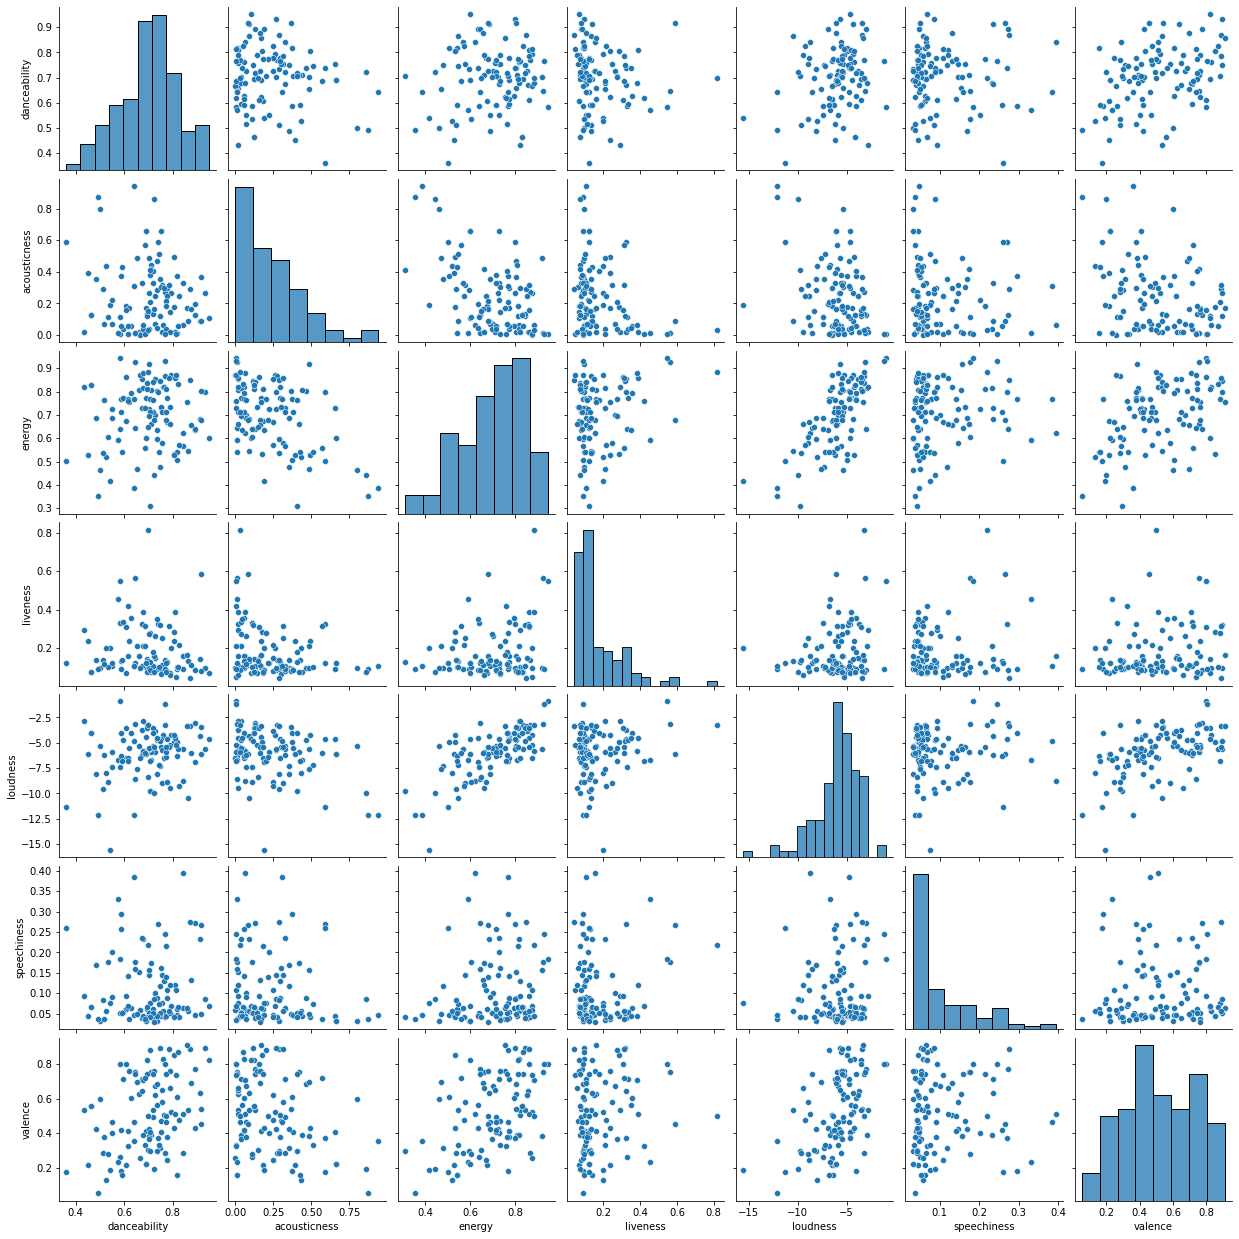

In [10]:
sns.pairplot(df_playlist)
plt.show()

Some insights: 

- if the acoustiness is low - the danceability is high
- if the acoustiness is low - the energy is high
- if the engergy gets higher - the loudness gets higher
- if the valence gets higher - the danceability, the energy and the loudness gets higher

Let's calculate the correlation, Pearson's r. The correlation means how the features 'go together'. The perfect correlation is +1 (e.g. when the temperatures go up - the sales of lemonade go up) which is actually impossible in real science - it is more likely to be lower - when we have 0 then there is no correlation and if the correlation is lower than 0 then we have a negative correlation (e.g. when the temperatures go up - the sales of hot chocolate go down).
But what is a "big correlation" and what is a "small correlation"?
It depens on the context, but we focus on a guidelike: 

Weak 0.1 < r < 0.3
Moderate 0.3 < r < 0.6
Strong > 0.6

To calculate the correlation we use the correlation matrix:


In [11]:
corr = df_playlist[['danceability', 'loudness', 'energy', 'acousticness','liveness', 'speechiness','valence']].corr() 
corr


,danceability,loudness,energy,acousticness,liveness,speechiness,valence
danceability,1.000000,0.221401,0.108614,-0.123363,-0.107016,0.006715,0.382584
loudness,0.221401,1.000000,0.715329,-0.330504,0.206655,0.084650,0.491800
energy,0.108614,0.715329,1.000000,-0.507247,0.209323,0.159281,0.464934
acousticness,-0.123363,-0.330504,-0.507247,1.000000,-0.294211,-0.150722,-0.336121
liveness,-0.107016,0.206655,0.209323,-0.294211,1.000000,0.124252,0.119950
speechiness,0.006715,0.084650,0.159281,-0.150722,0.124252,1.000000,0.020092
valence,0.382584,0.491800,0.464934,-0.336121,0.119950,0.020092,1.000000


This concludes: 

Track energy and track loudness have the highest correlation (r = 0.74).

Acousticness has negative correlations with the other features.
Liveness has also almost no strong correlation.


## 2) Data visualization with Seaborn

Lets visualize the features with the genres to get better insights about these.

### Correlation genres and audio features

The correlation matrix can only show the correlations of the numerical variables. Genres which we want to predict is a categorical variable. To see any kind of correlations with the genre of a track and any audio feature we visualize these to get insights.

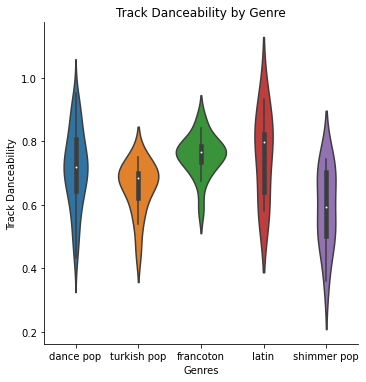

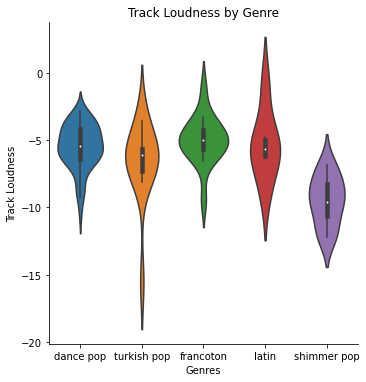

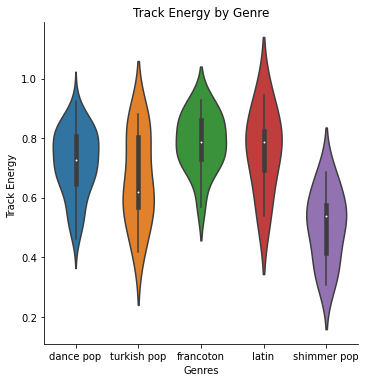

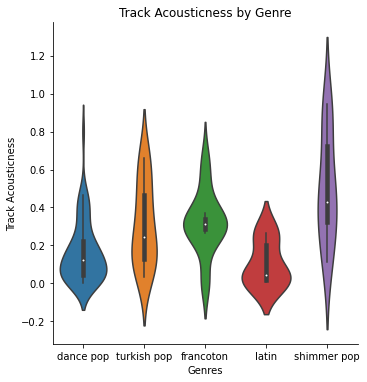

In [12]:
sns.catplot(data = df_playlist, x = "genres", y = "danceability", kind = "violin") #violin plot
plt.xlabel("Genres") 
plt.ylabel("Track Danceability")
plt.title("Track Danceability by Genre")

sns.catplot(data = df_playlist, x = "genres", y = "loudness", kind = "violin") #violin plot
plt.xlabel("Genres") 
plt.ylabel("Track Loudness")
plt.title("Track Loudness by Genre")
plt.show()

sns.catplot(data = df_playlist, x = "genres", y = "energy", kind = "violin") #violin plot
plt.xlabel("Genres") 
plt.ylabel("Track Energy ")
plt.title("Track Energy by Genre")
plt.show()

sns.catplot(data = df_playlist, x = "genres", y = "acousticness", kind = "violin") #violin plot
plt.xlabel("Genres") 
plt.ylabel("Track Acousticness")
plt.title("Track Acousticness by Genre")
plt.show()


What we can conclude: 

- all genres have a huge range of danceability. Latin songs are the tracks with the highest danceability (which makes sense) and some tracks of dance pop have the lowest danceability.
- almost all genres have most songs at a loudness of about -5
- almost all genres have most songs at a energy of about 0.8
- almost all genres have most songs at a acousticness in a range of 0.3 - 0
- almost all genre are similar however shimmer pop not

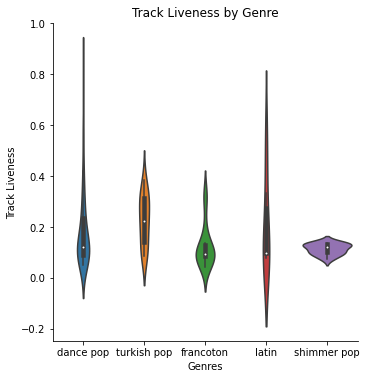

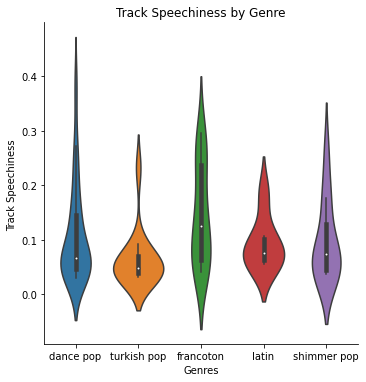

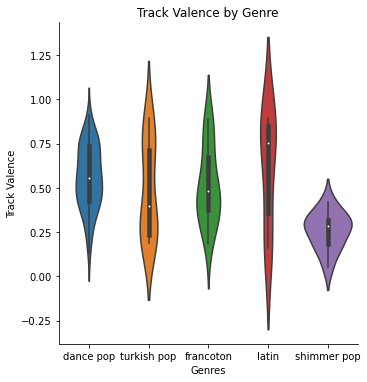

In [13]:
sns.catplot(data = df_playlist, x = "genres", y = "liveness", kind = "violin") #violin plot
plt.xlabel("Genres") 
plt.ylabel("Track Liveness")
plt.title("Track Liveness by Genre")
plt.show()

sns.catplot(data = df_playlist, x = "genres", y = "speechiness", kind = "violin") #violin plot
plt.xlabel("Genres") 
plt.ylabel("Track Speechiness ")
plt.title("Track Speechiness by Genre")
plt.show()

sns.catplot(data = df_playlist, x = "genres", y = "valence", kind = "violin") #violin plot
plt.xlabel("Genres") 
plt.ylabel("Track Valence")
plt.title("Track Valence by Genre")
plt.show()

What we can conclude here:

- especially latin and dance pop songs are with liveness but the most tracks are lower than 0.2
- track speechiness is over all genres at the most lower than 0.1
- track valence makes not really sense. We know that the track valence are between 0 and 1 but in this plot it shows that there are values lower than 0 and higher than 1 - how? I check this values with another plot maybe the violin makes not sense here.

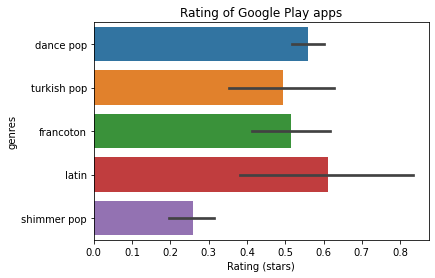

In [14]:
sns.barplot(x="valence", y="genres", data=df_playlist) #bar plot
plt.title('Rating of Google Play apps')
plt.xlabel('Rating (stars)')
plt.show()


Ok, the violin plot was not good for visualizing the valence of a track. The valences are relatively high in a range of 0.5 - 0.6.

Shimmer pop is relatively sad in comparison to the other genres. 

# 3) Building the model
## 3.1) K-nearest neighbor (KNN)

KNN is a algorithm in machine learning to predict in this case classification.

In [15]:
df_playlist['genres'].value_counts()

dance pop      61
francoton      16
turkish pop    14
shimmer pop    11
latin           6
Name: genres, dtype: int64

In [16]:
X = df_playlist[['danceability', 'acousticness', 'energy', 'liveness', 'loudness', 'speechiness', 'valence']] #create the X matrix
X = normalize(X) #normalize the matrix to put everything on the same scale
y = df_playlist['genres'] #create the y-variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) #split the data, store it into different variables

In [17]:
knn = KNeighborsClassifier(n_neighbors=5) #create a KNN-classifier with 5 neighbors (default)
knn = knn.fit(X_train, y_train) #this fits the k-nearest neigbor model with the train data
knn.score(X_test, y_test) #calculate the fit on the test data

0.5757575757575758

57.57% of tracks are predicted accurately. Is this good or bad?

Well, given that 54% of the tracks are dance pop, we could actaully get this performance by predicting everything is 'dance pop'. So, not so great, but kind of expected given the variables. Let's look at the confusion matrix to see how well the model tells apart the different genres. A confusion matrix gives a the different classes and the number of predictions for each combination.

## 3.1) Evalutation of the classification
Evaluation of the classification is done with the confusion matrix.

You can calculate 3 things
- accurancy (a percentage that was predicted correctly)
- precision (when I predict the genre "dance pop" how much of this is "dance pop"?, how precise are you to predict "dance pop"?)
- recall (how much of the real "dance pop" is predicted as "dance pop"?)

## Whats the optimal amount of neighbors?

In [18]:
from sklearn.metrics import classification_report

for i in range(1,11):
    knn_new = KNeighborsClassifier(n_neighbors = i) #make a new kNN model with i (1-10) neighbors
    knn_new = knn_new.fit(X_train, y_train) #fit new model on train data
    y_test_pred_new = knn_new.predict(X_test) #predict using new model, with test data
    print(f"With {i} neighbors the result is:")
    print(classification_report(y_test, y_test_pred_new)) #use a built-in function to print out accuracy, precision and recall

With 1 neighbors the result is:
              precision    recall  f1-score   support

   dance pop       0.56      0.56      0.56        16
   francoton       0.33      0.40      0.36         5
       latin       0.00      0.00      0.00         2
 shimmer pop       1.00      0.33      0.50         6
 turkish pop       0.14      0.25      0.18         4

    accuracy                           0.42        33
   macro avg       0.41      0.31      0.32        33
weighted avg       0.52      0.42      0.44        33

With 2 neighbors the result is:
              precision    recall  f1-score   support

   dance pop       0.50      0.88      0.64        16
   francoton       0.33      0.20      0.25         5
       latin       0.00      0.00      0.00         2
 shimmer pop       1.00      0.17      0.29         6
 turkish pop       0.00      0.00      0.00         4

    accuracy                           0.48        33
   macro avg       0.37      0.25      0.23        33
weighted avg 

C:\Users\mine-\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\mine-\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\mine-\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\mine-\anaconda3\lib\site-packages\sklearn\metr

The best prediction is 61% with 6 neighbors. 

## 3.2) Random Forest

Lets use another way for classification - with Random Forest. 

First, we define the X-Variables (which are our independent variables) and the Y-Variable (which is our dependent variable). 

In [19]:
X = df_playlist.loc[:,'danceability':'valence'] #This gets all the columns from Danceability to Valence
y = df_playlist['genres']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [20]:
df_playlist.head(5)

,danceability,acousticness,energy,liveness,loudness,speechiness,valence,genres
17,0.750,0.3550,0.477,0.0962,-7.287,0.1180,0.312,dance pop
20,0.726,0.0717,0.700,0.2620,-5.881,0.0998,0.673,dance pop
21,0.690,0.1700,0.774,0.1020,-4.467,0.0390,0.414,dance pop
22,0.550,0.0692,0.688,0.1060,-7.416,0.0897,0.465,dance pop
24,0.701,0.2670,0.724,0.0867,-5.751,0.1450,0.425,dance pop


### 3.2) Training the algorithm

Let's train the Random Forest algorithm. RF uses randomness, so we need to set a random_state if we want the result to be stable for presentation purposes.

In [21]:
rf = RandomForestClassifier(random_state=1, n_estimators=100) #RF is a random algorithm, so to get the same results we need to use random_state
rf = rf.fit(X_train, y_train)

### 3.2) Evaluating the model

Let's evaluate the model using our standard approach for a classification problem: making a confusion matrix and calculating accuracy, precision and recall.

The confusion matrix uses the sorted labels, so 0 comes first, 1 second

In [22]:
y_pred = rf.predict(X_test) #the predicted values
cm = confusion_matrix(y_test, y_pred) #creates a "confusion matrix"
cm = pd.DataFrame(cm, index=['dance pop', 'francoton', 'turkish pop', 'shimmer pop', 'latin'], columns = ['dance pop_p', 'francoton_p', 'turkish pop_p', 'shimmer pop_p', 'latin_p']) #label and make df
cm

,dance pop_p,francoton_p,turkish pop_p,shimmer pop_p,latin_p
dance pop,15,0,0,0,1
francoton,4,0,0,0,1
turkish pop,2,0,0,0,0
shimmer pop,4,0,0,2,0
latin,3,0,0,0,1


As we can see from the confusion matrix, the genres are not predicted that good. When turkish pop was predicted, it was never actual turkish pop, francoton is predicted correctly 1/3 of all francoton predictions. In case of latin only 1 prediction of 4 was right. Dancepop has the most correct predictions but it also has the most values in the dataset. When Shimmer pop was predicted - it was 2 times of 3 correct.

In [23]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

   dance pop       0.54      0.94      0.68        16
   francoton       0.00      0.00      0.00         5
       latin       0.00      0.00      0.00         2
 shimmer pop       1.00      0.33      0.50         6
 turkish pop       0.33      0.25      0.29         4

    accuracy                           0.55        33
   macro avg       0.37      0.30      0.29        33
weighted avg       0.48      0.55      0.46        33



C:\Users\mine-\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


The precision tell us that 54% of dance pop are correct, 0% of francoton are correct, no latin prediction is correct, 100% of shimmer pop are correct and 33% of turkish pop are correct.
The accuracy is about 55% which is very low when we remember that 54% of the tracks are dance pop. Random forest is in comparison to KNN weak.

### 3.2) Different parameters

We can change different parameters of the Random Forest algorithm.

In [24]:
rf_new  = RandomForestClassifier(n_estimators = 1, max_features = 4, random_state=1) #RF is a random algorithm, so to get the same results we need to use random_state
rf_new = rf_new.fit(X_train, y_train)
y_pred_new = rf_new.predict(X_test) #the predicted values
print(classification_report(y_test, y_pred_new))

              precision    recall  f1-score   support

   dance pop       0.71      0.75      0.73        16
   francoton       0.00      0.00      0.00         5
       latin       0.50      0.50      0.50         2
 shimmer pop       1.00      0.33      0.50         6
 turkish pop       0.27      0.75      0.40         4

    accuracy                           0.55        33
   macro avg       0.50      0.47      0.43        33
weighted avg       0.59      0.55      0.52        33



With 4 max features instead of 7 the prediction the accuracy stays the same.

## 3.3) Retrying KNN without the audio feature "acousticness"

Lets do this again but without acousticness. As we saw in the correlation matrix before is has negative correlations to the other audio features.

In [25]:
X = df_playlist[['danceability', 'energy', 'liveness', 'loudness', 'speechiness', 'valence']] #create the X matrix
X = normalize(X) #normalize the matrix to put everything on the same scale
y = df_playlist['genres'] #create the y-variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) #split the data, store it into different variables

In [26]:
knn = KNeighborsClassifier(n_neighbors=5) #create a KNN-classifier with 5 neighbors (default)
knn = knn.fit(X_train, y_train) #this fits the k-nearest neigbor model with the train data
knn.score(X_test, y_test) #calculate the fit on the test data

0.5757575757575758

In [27]:
for i in range(1,11):
    knn_new = KNeighborsClassifier(n_neighbors = i) #make a new kNN model with i (1-10) neighbors
    knn_new = knn_new.fit(X_train, y_train) #fit new model on train data
    y_test_pred_new = knn_new.predict(X_test) #predict using new model, with test data
    print(f"With {i} neighbors the result is:")
    print(classification_report(y_test, y_test_pred_new)) #use a built-in function to print out accuracy, precision and recall

With 1 neighbors the result is:
              precision    recall  f1-score   support

   dance pop       0.57      0.50      0.53        16
   francoton       0.40      0.40      0.40         5
       latin       0.00      0.00      0.00         2
 shimmer pop       1.00      0.33      0.50         6
 turkish pop       0.25      0.50      0.33         4

    accuracy                           0.42        33
   macro avg       0.44      0.35      0.35        33
weighted avg       0.55      0.42      0.45        33

With 2 neighbors the result is:
              precision    recall  f1-score   support

   dance pop       0.52      0.81      0.63        16
   francoton       0.50      0.20      0.29         5
       latin       0.00      0.00      0.00         2
 shimmer pop       1.00      0.33      0.50         6
 turkish pop       0.00      0.00      0.00         4

    accuracy                           0.48        33
   macro avg       0.40      0.27      0.28        33
weighted avg 

C:\Users\mine-\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\mine-\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\mine-\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\mine-\anaconda3\lib\site-packages\sklearn\metr

Taking acousticness out of the algorithm has no or a bad effect. 
We keep acoussticness in the Model and have a prediction with 61% accurancy.

## Conclusion

Predicting a genre with 7 features works better with KNN than with Random Forest. However, even the prediction with KNN is not strong enough. This would probably work better with genres that are more different than the 5 genres used within this project. In my case, I am listening to 4 genres that are not drastically different in their audio features. 

## 2) Regression: Predicting song popularity through audio features

Here we take a different approach. How well can we predict the popularity of a song by its audio features? Hereby, we use all genres. In the part before we only used 5 genres. Thats why this dataset is a bit larger than the one we used for classification.

In [28]:
df_popularity = df[['danceability','acousticness','energy','liveness','loudness', 'speechiness','valence','genres','popularity']]

In [29]:
df_popularity.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 269 entries, 0 to 25
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   danceability  269 non-null    float64
 1   acousticness  269 non-null    float64
 2   energy        269 non-null    float64
 3   liveness      269 non-null    float64
 4   loudness      269 non-null    float64
 5   speechiness   269 non-null    float64
 6   valence       269 non-null    float64
 7   genres        269 non-null    object 
 8   popularity    269 non-null    int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 21.0+ KB


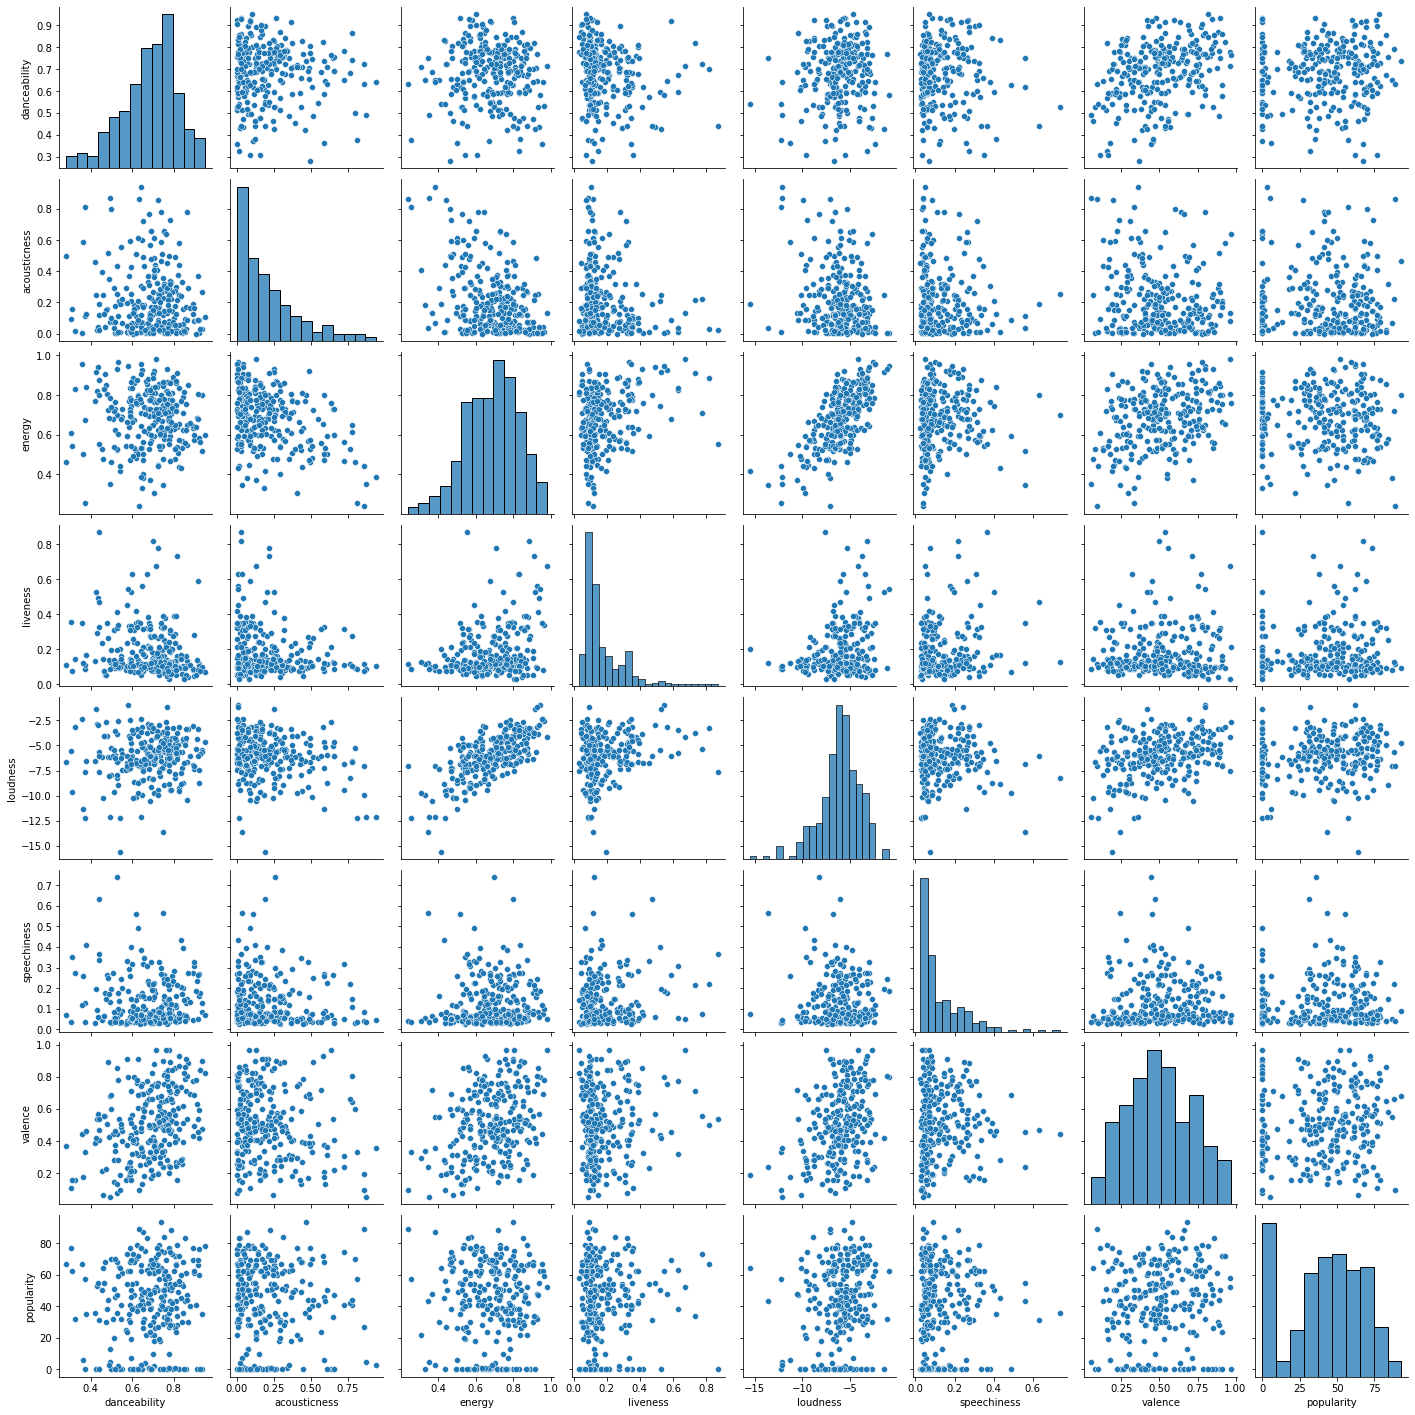

In [30]:
sns.pairplot(df_popularity)
plt.show()

We already know almost all the correlations. However, here is still the popularity of a song. The popularity increases when the valence, the loudness, the energy and the danceability of a song increases. 

Lets set the X-Variables and the Y-Variable for the RF-Model!

In [31]:
y = df_popularity['popularity'] #We need to take out the rating as our Y-variable
X = df_popularity.loc[:,'danceability':'valence'] #this slices the dataframe to include all rows and the columns from "danceability" to "valence"
X.index = df_popularity['genres'] #this stores the genres of the tracks
X.head()

,danceability,acousticness,energy,liveness,loudness,speechiness,valence
genres,,,,,,,
dutch experimental electronic,0.643,0.0582,0.711,0.0509,-7.049,0.0640,0.363
dutch experimental electronic,0.810,0.0326,0.743,0.1250,-5.664,0.0348,0.272
dutch experimental electronic,0.780,0.2300,0.592,0.1840,-6.020,0.0631,0.705
dutch experimental electronic,0.743,0.0581,0.671,0.1950,-5.594,0.0589,0.484
dutch experimental electronic,0.786,0.3300,0.705,0.1260,-5.419,0.0852,0.469


Before we train the model, we devide the data into train und the test set.

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) #split the data, store it into different variables
X_train.head() #The train data

,danceability,acousticness,energy,liveness,loudness,speechiness,valence
genres,,,,,,,
dance pop,0.720,0.406,0.763,0.1800,-4.068,0.0523,0.742
colombian pop,0.548,0.188,0.677,0.1590,-5.495,0.2430,0.489
british soul,0.729,0.130,0.777,0.0541,-5.112,0.0293,0.527
dance pop,0.551,0.221,0.727,0.1200,-5.903,0.2010,0.400
dance pop,0.819,0.376,0.506,0.0908,-4.965,0.0479,0.608


Now, let's train the linear model.

In [33]:
lm = LinearRegression() #create the model
model = lm.fit(X_train, y_train) #train the model

Let's have a look at the coefficients.

In [34]:
coef = pd.DataFrame(X.columns.values, lm.coef_) #this creates a df with a column with the column names, and the coefficients of the model
coef

,0
-8.789904,danceability
-6.291402,acousticness
-57.982054,energy
14.156385,liveness
1.878781,loudness
0.863995,speechiness
13.146712,valence


We can interpret these coefficients as follows:

- Danceability decreases 8.789 of a tracks popularity
- Acousticness decreases 6.29  of a tracks popularity
- Energy decreases 57.98 the popularity of a track
- Liveness increases 14.15 the popularity of a track
- Loudness adds 1.87 to a tracks popularity
- Speechiness adds 0.863995 to its popularity
- Valence adds 13.146712 to its popularity

Finally, let's look at the model performance. We'll generate predictions and calculate the R^2 and RMSE.

With R^2 we can explain the propotion of variance that you can explain with your model. Its between 0 and 1. 0 means that it can be 0% explained by the model, 1 means that it can be explained 100% by the model.

In [35]:
y_test_p = lm.predict(X_test) #Generate predictions for the test data. So we use X.test, not X.train
r2_score(y_test, y_test_p)

-0.03372007042785374

The R^2 is 0.033, which means 0.033 of the variation of the popularity of a track is explained by the model. Thats terrible. This means that a popularity of a track is not really because of the audio features. But it makes sense.  

Let's calculate the RMSE: the root mean squared error.

In [36]:
math.sqrt(mean_squared_error(y_test, y_test_p))

26.207225665363005

The RMSE is 26.20. Which means that we are typically about 26.2 off in our predicted rating. 

## Conclusion

The popularity of a track cannot really predicted by the audio features which makes sense. There are other factors which make a song popular like the name of the artist, the lyrics of a song or in how many playlists one track is (marketing). 